In [5]:
import os

base_path = "C:\\Projects\\ature" # WINDOWS
# base_path = "home/ak/Projects/ature/" # LINUX

data_file_path = base_path + "\\data\\DRIVE\\test\\images"
out_path = base_path + "\\out\\out_new"
    
os.chdir(base_path)

from commons.IMAGE import Image
from commons.ImgLATTICE import Lattice
import preprocess.utils.img_utils as imgutils
from commons.MAT import Mat
from PIL import Image as IMG
import numpy as np
from commons import constants as const
import cv2
from preprocess.algorithms import fast_mst as fmst

In [2]:
# file = Mat(file_name=data_file_path+'19_test.tif')
# original = file.get_image('I2')[:,:,1]

TypeError: __init__() got an unexpected keyword argument 'file_name'

In [7]:
original = IMG.open(data_file_path +'\\19_test.tif')
original = np.array(original.getdata(), np.uint8).reshape(original.size[1], original.size[0], 3)[:,:,1]
# os.chdir('D:\\idea projects\\pycharm projects\\ature\\data\\training\\mask\\')
# mask = IMG.open('21_training_mask.gif')
# mask = np.array(mask.getdata(), np.uint8).reshape(mask.size[1], mask.size[0])

In [8]:
img = Image(image_arr=original)

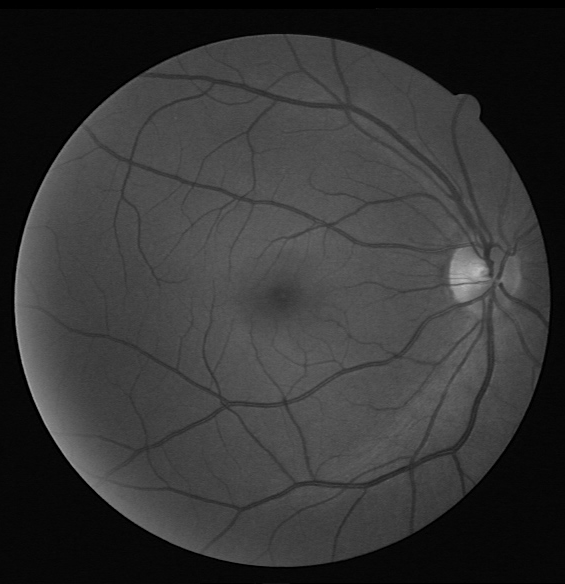

In [9]:
IMG.fromarray(img.img_array)

In [10]:
img.apply_bilateral()

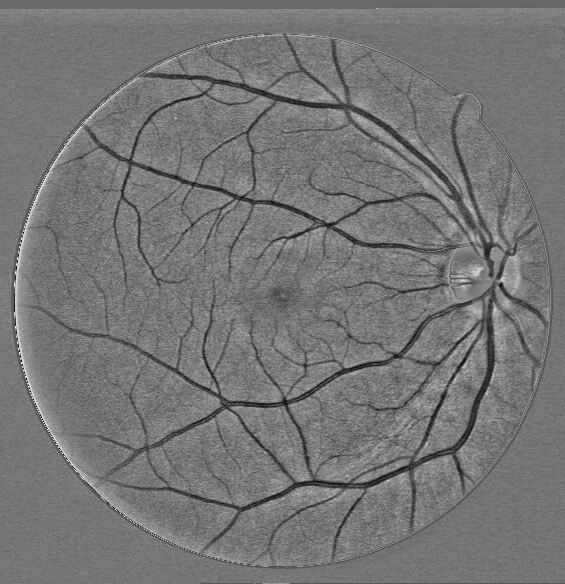

In [11]:
IMG.fromarray(img.diff_bilateral)

In [12]:
img.apply_gabor(kernel_bank= imgutils.get_chosen_gabor_bank())

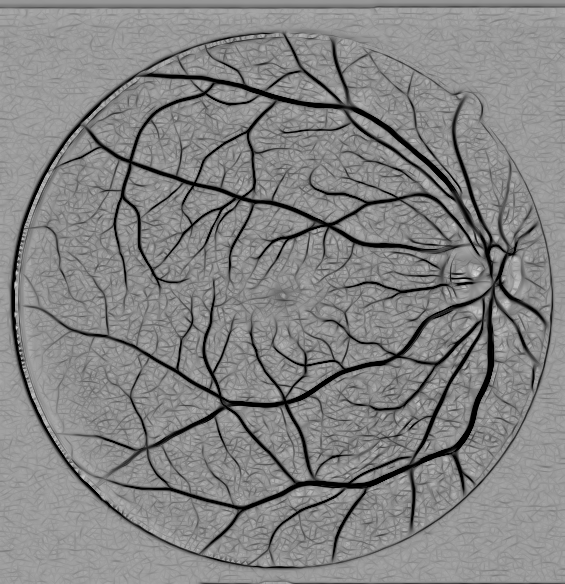

In [13]:
IMG.fromarray(img.img_gabor)

In [14]:
img.create_skeleton(kernels=imgutils.get_chosen_skeleton_filter(),threshold=100)

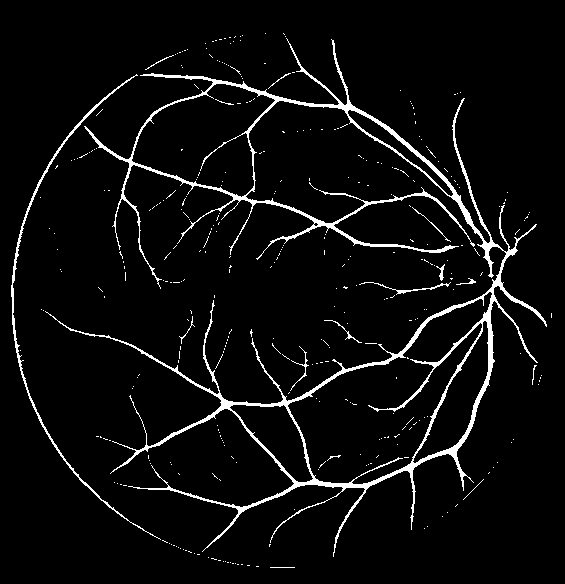

In [15]:
IMG.fromarray(255-img.img_skeleton)

In [43]:
seed_node_list = imgutils.get_seed_node_list(img.img_skeleton)

In [44]:
len(seed_node_list)

24359

In [45]:
lattice = Lattice(image_arr_2d=img.img_gabor)

In [46]:
lattice.generate_lattice_graph(eight_connected=False)

In [ ]:
# costs = []
# for n in seed_node_list:
#     for o in graph[n]:
#         costs.append(graph[n][o].get('cost'))
# np.max(costs)

In [ ]:
 graph = fmst.run_segmentation(image_object=img,
                          lattice_object=lattice,
                          seed_list=seed_node_list,
                          segmentation_threshold=7.5,
                          alpha=5,
                          img_gabor_contribution=0.8,
                          img_original_contribution=0.2)

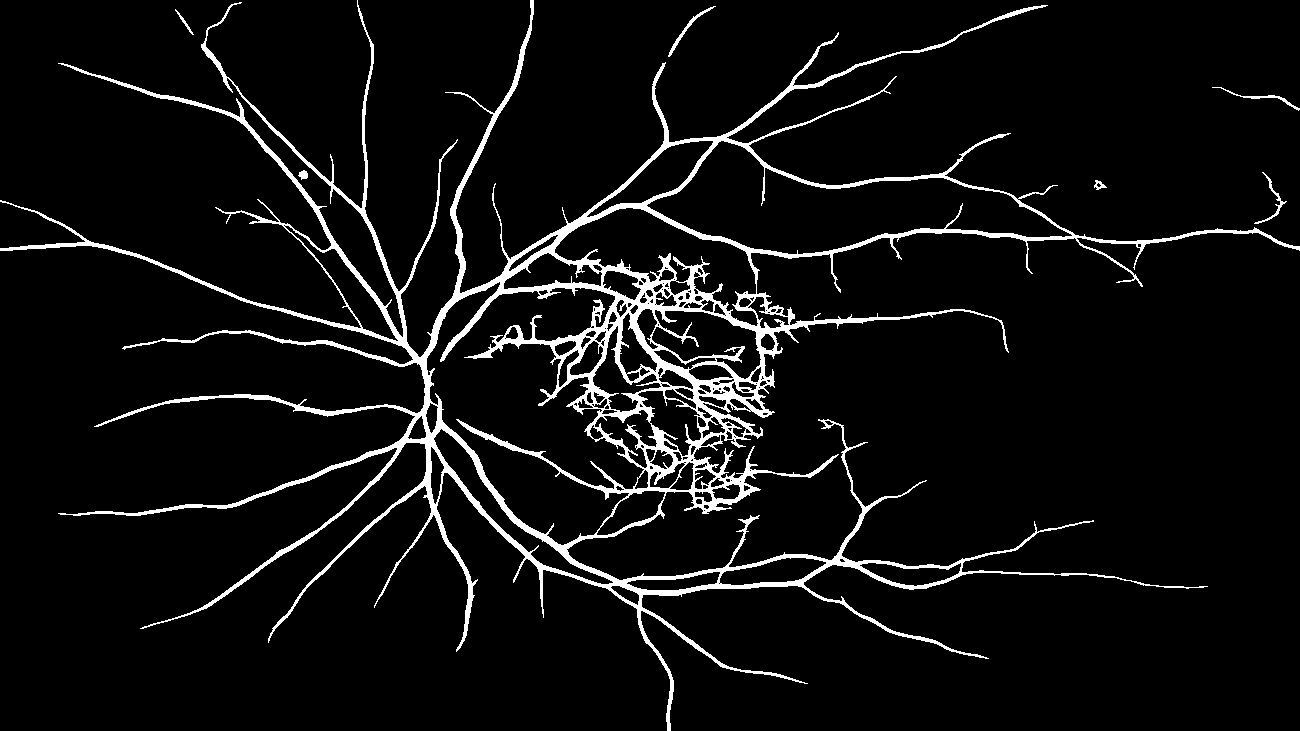

In [48]:
IMG.fromarray(lattice.accumulator)

In [ ]:
IMG.fromarray(lattice.accumulator)

In [21]:
a = np.array([[2,1,0],[3,4,0],[5,6,0]])

In [22]:
a[:,2]==0

array([ True,  True,  True])

In [3]:
g ={''}

In [4]:
g['a']

TypeError: 'set' object is not subscriptable